In [2]:
import networkx as nx
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#配置字体参数雅黑
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#安装字体
plt.rcParams['font.sans-serif'] = 'SimHei'
#配置矢量图
%config InlineBack终点.figure_format = 'svg'

In [4]:
df_graph = pd.read_excel("./CityGraph.xlsx")
df_graph

,from,to
0,C,A
1,C,L
2,A,T
3,L,T
4,L,N
5,T,E
6,N,E
7,N,Q
8,E,P
9,E,W


In [5]:
df_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   from    38 non-null     object
 1   to      38 non-null     object
dtypes: object(2)
memory usage: 736.0+ bytes


In [6]:
df1 = pd.read_excel("./Attachment 2.xlsx")

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56778 entries, 0 to 56777
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   日期(年/月/日) (Date Y/M/D)                       56778 non-null  datetime64[ns]
 1   发货城市 (Delivering city)                       56778 non-null  object        
 2   收货城市 (Receiving city)                        56778 non-null  object        
 3   快递运输数量(件) (Express delivery quantity (PCS))  56778 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
df1.columns = ["日期","发货城市","收货城市","快递运输数量"]

In [12]:
df1

,日期,发货城市,收货城市,快递运输数量
0,2020-04-28,R,O,216
1,2020-04-28,R,L,320
2,2020-04-28,R,G,110
3,2020-04-28,R,D,96
4,2020-04-28,P,D,144
...,...,...,...,...
56773,2023-04-27,I,S,47
56774,2023-04-27,I,E,65
56775,2023-04-27,J,I,337
56776,2023-04-27,J,K,242


In [13]:
df1 = df1[df1["日期"]>"2023-04-22"].reset_index(drop=True)

In [14]:
df1

,日期,发货城市,收货城市,快递运输数量
0,2023-04-23,P,D,120
1,2023-04-23,Q,A,140
2,2023-04-23,Q,M,48
3,2023-04-23,R,G,83
4,2023-04-23,Q,V,171
...,...,...,...,...
399,2023-04-27,I,S,47
400,2023-04-27,I,E,65
401,2023-04-27,J,I,337
402,2023-04-27,J,K,242


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      404 non-null    datetime64[ns]
 1   发货城市    404 non-null    object        
 2   收货城市    404 non-null    object        
 3   快递运输数量  404 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 12.8+ KB


In [16]:
df2 = pd.read_excel("./Attachment 3.xlsx")

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   起点 (Start)                   78 non-null     object 
 1   终点 (End)                     78 non-null     object 
 2   固定成本 (Fixed cost)            78 non-null     float64
 3   额定装货量(件) (Rated load (PCS))  78 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB


In [18]:
df2.columns = ["起点","终点","固定成本","额定装货量"]

In [19]:
df2["线路"] = df2["起点"] +"->"+ df2["终点"]

In [20]:
df2

,起点,终点,固定成本,额定装货量,线路
0,A,T,3.6,200,A->T
1,A,C,2.4,200,A->C
2,T,A,3.6,200,T->A
3,T,L,3.0,200,T->L
4,T,E,2.4,200,T->E
...,...,...,...,...,...
73,V,F,2.4,200,V->F
74,P,U,1.8,200,P->U
75,U,P,2.0,200,U->P
76,E,W,1.8,200,E->W


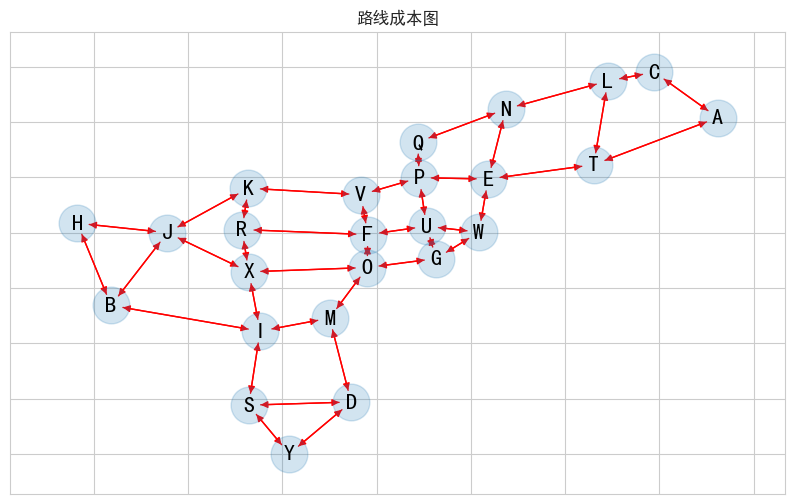

In [26]:
## 从附件3的数据中获得有向图
G2 = nx.DiGraph()
## 通过边数据表为图像添加边
for ii in df2.index:
    G2.add_edge(df2["起点"][ii],df2["终点"][ii],weight = df2["固定成本"][ii])
## 计算节点位置的布局方式
pos2 = nx.kamada_kawai_layout(G2,weight="weight")
# pos = nx.spring_layout(G)
## 可视化网络图
plt.figure(figsize=(10, 6))
## 设置节点上的标签
nx.draw_networkx_nodes(G2,pos=pos2,node_size = 700,alpha = 0.2)
nx.draw_networkx_labels(G2,pos=pos2,font_size=16,
                        font_color="k",alpha=1,horizontalalignment="center",
                        verticalalignment="center")
nx.draw_networkx_edges(G2,pos=pos2,width=1,alpha=1,edge_color= "red")
plt.title("路线成本图")
plt.axis("on")
plt.show()

In [27]:
df_result = df1[df1["日期"] == "2023-04-23"].reset_index(drop=True)

In [28]:
df_result

,日期,发货城市,收货城市,快递运输数量
0,2023-04-23,P,D,120
1,2023-04-23,Q,A,140
2,2023-04-23,Q,M,48
3,2023-04-23,R,G,83
4,2023-04-23,Q,V,171
...,...,...,...,...
76,2023-04-23,I,S,47
77,2023-04-23,I,J,172
78,2023-04-23,I,F,62
79,2023-04-23,I,E,60


In [29]:
## 按照日期分别计算成本
total_costs = []
for date in pd.date_range("2023-04-23", "2023-04-27"):
    df_result = df1[df1["日期"] == date].reset_index(drop=True)

    def LineCostEach(cost,number,Rdnum):
        finalcost = cost * (1+(number/Rdnum)**3)
        return finalcost

    ## G2使用了固定成本作为路径的权重
    paths = []
    pathlens = []
    for ii in np.arange(len(df_result)):
        shortpath = nx.shortest_path(G2,source=df_result["发货城市"][ii],target=df_result["收货城市"][ii])
        paths.append(shortpath)
        pathlens.append(len(shortpath))

    df_result["paths2"] = paths
    df_result["pathlens2"] = pathlens

    # 假定最短路线就是最优的运输路线
    mincostalls = []
    for ii in np.arange(len(df_result)):
        paths = df_result["paths2"][ii]
        Number = df_result["快递运输数量"][ii]
        mincostall = 0
        for jj in np.arange(len(paths)-1):
            ## 路线的开始，和结束
            pathstar = paths[jj]
            pathend = paths[jj+1]
            line = pathstar + "->" + pathend
            lineinfo = df2[df2["线路"] == line]
            costline = LineCostEach(lineinfo["固定成本"].values,Number,lineinfo["额定装货量"].values)
            mincostall = mincostall + costline
        mincostalls.append(mincostall)
    df_result["Cost2"] = mincostalls

    total_costs.append(df_result["Cost2"].sum())

print(total_costs)


[array([1403.78617285]), array([1710.43262822]), array([1572.00173302]), array([1396.59758158]), array([1449.43044607])]


In [30]:
df_costs = pd.DataFrame({'日期': pd.date_range("2023-04-23", "2023-04-27"), '成本': total_costs})
df_costs.to_excel('q4result.xlsx', index=False)

In [31]:
df=pd.read_excel('./q4result.xlsx')

In [34]:
df

,日期,成本
0,2023-04-23,[1403.78617285]
1,2023-04-24,[1710.43262822]
2,2023-04-25,[1572.00173302]
3,2023-04-26,[1396.59758158]
4,2023-04-27,[1449.43044607]


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      5 non-null      datetime64[ns]
 1   成本      5 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 208.0+ bytes
